In [1]:
import os
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [7]:
#get the final output data for the shifted wobble
sw_df= pd.read_csv('../../../results/nr_shifted_wobble_map_model_cc.csv')

#filtering out the redundant ones (non-representative ones)
sw_df1= sw_df[sw_df['representative']==1]
sw_df1.index= np.arange(0, len(sw_df1))

In [8]:
sw_df1.columns

Index(['PDB_ID', 'Experimental_Method', 'Resolution (Å)', 'chain_ID', 'seg_ID',
       'Source_Organism_chain', 'Molecule', 'Source_Organism_all',
       'Expressed_Organism', 'Chain_length_reference',
       'Chain_length_structure', 'res_index_res1', 'bp_notation',
       'res_ID_res1', 'res_index_res2', 'res_ID_res2', 'bp_res', 'bp_ID',
       'DMS_reactivity_data', 'b_resG', 'b_resU', 'b_comb', 'O6_O4_dih',
       'N1_O2_dis', 'N1_N3_dis', 'N1_O4_dis', 'N2_O2_dis', 'N2_N3_dis',
       'N2_O4_dis', 'O6_O2_dis', 'O6_N3_dis', 'O6_O4_dis', 'N1_O4_dih',
       'N2_N3_dih', 'flank1', 'flank2', 'adj_res1', 'adj_res2', 'red_group_ID',
       'number_of_group_members', 'missing_res_atoms', 'RMSD_to_avg',
       'representative', 'Median_map_model_cc', 'Mean_map_model_cc',
       'Raw_map_model_cc_for_the_G', 'Normalized_map_model_cc_for_the_G',
       'Percentile_cc_for_the_G', 'Raw_map_model_cc_for_the_U',
       'Normalized_map_model_cc_for_the_U', 'map_model_cc_outliers',
       'N1_O4_b

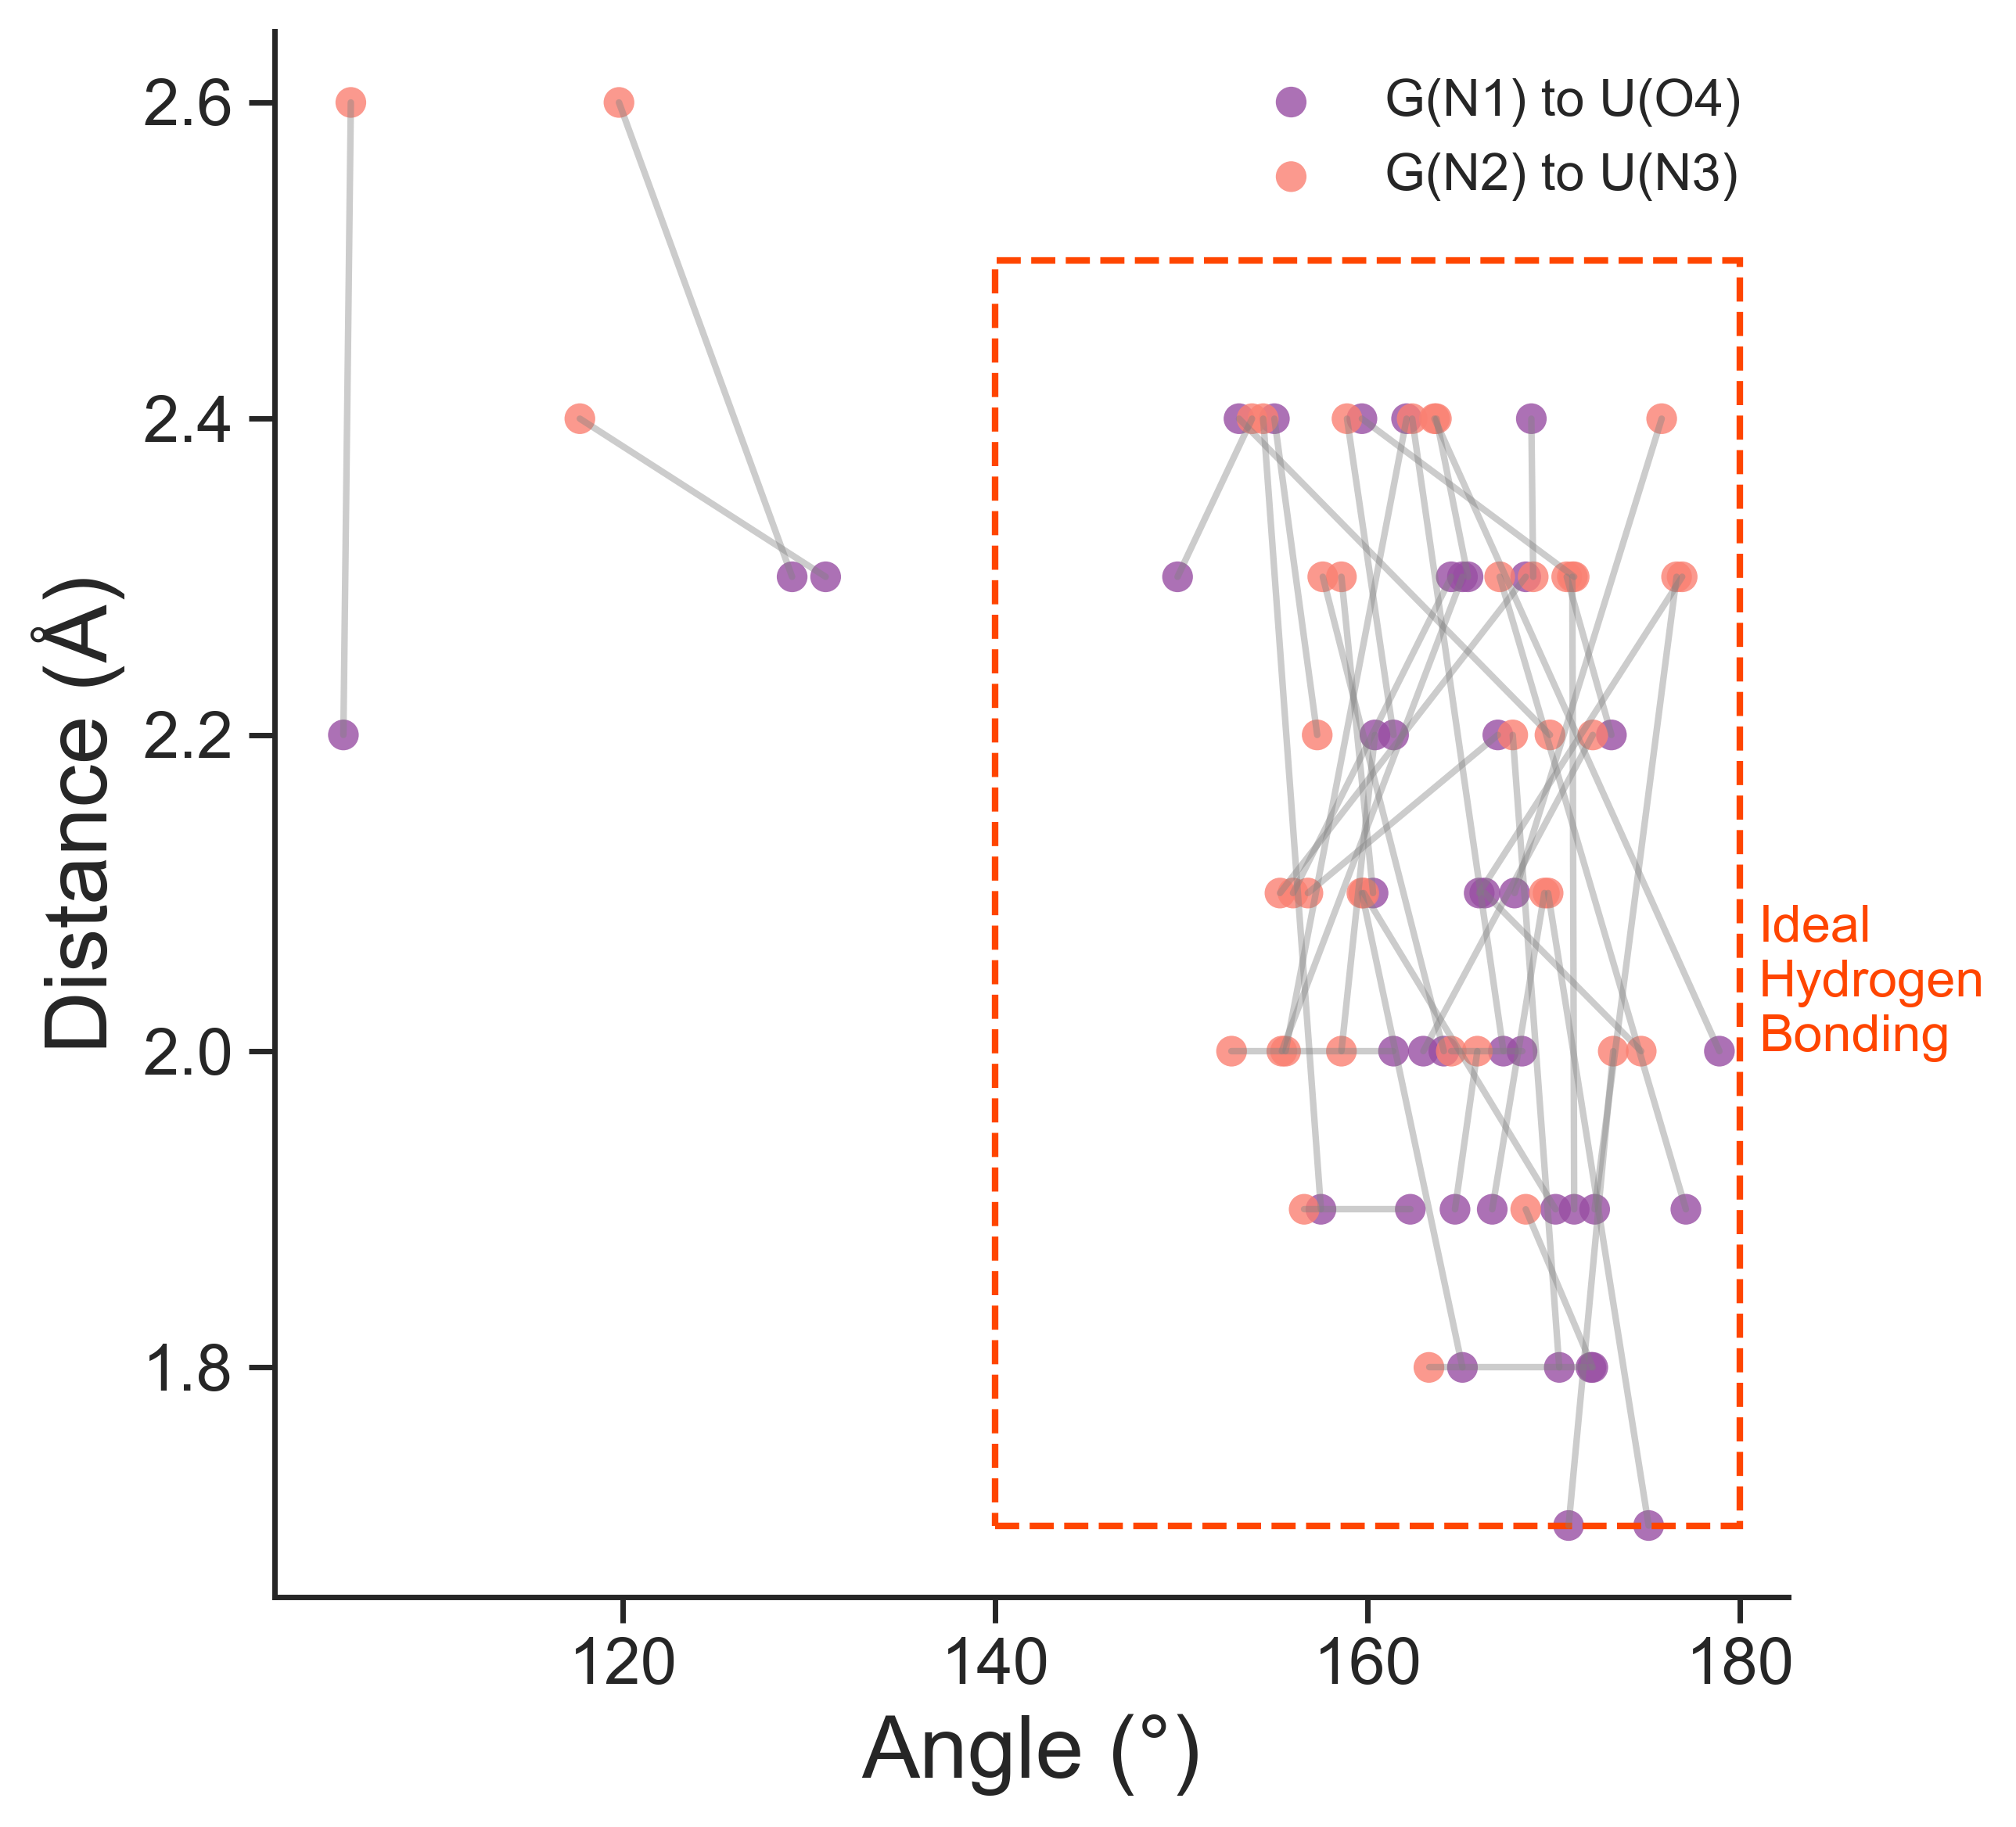

In [15]:
sns.set(style= 'ticks', font= "Arial")
fig, ax = plt.subplots(figsize = (6,6), dpi = 400)

# Loop through each row and plot points and connecting lines
for i, row in sw_df1.iterrows():
    plt.plot([row['N1_O4_bond_angle'], row['N2_N3_bond_angle']], [row['N1_O4_bond_distance'], row['N2_N3_bond_distance']], color='gray', linestyle='-', alpha=0.4, linewidth=1.5)

# Scatter plot for col1 vs col2
plt.scatter(sw_df1['N1_O4_bond_angle'], sw_df1['N1_O4_bond_distance'], color='#984ea3', label='G(N1) to U(O4)', s= 50, alpha= 0.8, edgecolors='none')

# Scatter plot for col3 vs col4
plt.scatter(sw_df1['N2_N3_bond_angle'], sw_df1['N2_N3_bond_distance'], color='Salmon', label='G(N2) to U(N3)', s= 50, alpha= 0.8, edgecolors='none')

# Add labels, legend, and grid
plt.xlabel('Angle (°)', fontsize=20)
plt.ylabel('Distance (Å)', fontsize=20)
plt.legend(fontsize=12, frameon=False) 

plt.tick_params(axis='both', which='major', labelsize=15)

plt.grid(False)

# Show plot
plt.tight_layout()


ax= plt.gca()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)


# Add a rectangle to highlight a specific area
# Define the bottom-left corner, width, and height of the rectangle
rect_x = 140  # X-coordinate of the bottom-left corner
rect_y = 1.7  # Y-coordinate of the bottom-left corner
rect_width = 40  # Width of the rectangle
rect_height = .8  # Height of the rectangle

# Create and add the rectangle
rectangle = Rectangle(
    (rect_x, rect_y), rect_width, rect_height,
    linewidth=1.5,
    edgecolor="orangered",
    facecolor="none",
    linestyle="--"
)
plt.gca().add_patch(rectangle)

plt.text(181, 2.0, "Ideal\nHydrogen\nBonding", fontsize=12, color='orangered')

#Ideal Hydrogen Bonding

plt.savefig('fig_S2_bond_length_vs_bond_angle.pdf', format="pdf", bbox_inches="tight", dpi = 3000)